# Problem set 2 

## 155 pts

## For problems 1, 2, 4: all functions that you are asked to implement, you have to complete in separate file ```pset2.py```, where we provide signatures of the required functions . Also only this ```py```-file you have to submit in the bot to check correctness of your implementations.

## For problem 3: see instructions in text

## Problem 1 (LU decomposition) 35 pts

### 1. LU for band matrices 

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of sparse matrices –– band matrices with the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively.

- (5 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with given diagonal values. 
For example, input parametres ```(diag_broadcast = [1,-2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
-2 & 1 & 0 & 0\\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -2 \\
\end{pmatrix}.$$

As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[:,0]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...). More details you can find in comments to the corresponding function in ```pset2.py``` 
- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

```python
#General LU-decomposition of a square matrix without pivoting
def recursive_lu(A):
    A_copy = np.copy(A)
    L = np.identity(A.shape[0])
    U = np.zeros_like(A)
    
    for i in range(n-1):
        U[i,i:] = A_copy[i,i:]    # u12
        L[i+1:,i] = A_copy[i+1:,i] / A_copy[i,i]   # l21
        A_copy[i+1:,i+1:] -= np.outer(L[i+1:,i],U[i,i+1:])     # l22 u22
    U[n-1,n-1] = A_copy[n-1,n-1]
    return L,U
```

In [1]:
# Implement function in the ```pset2.py``` file
from pset2 import band_lu
from scipy.sparse import diags # can be used with broadcasting of scalars if desired dimensions are large
from scipy.linalg import lu
import numpy as np

# Your code is here

In [102]:
n_elems = 8192
diag_broadcast = np.array([20,1,2,1,1],dtype=float)

In [103]:
%timeit band_lu(diag_broadcast,n_elems)

20.5 ms ± 76.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [104]:
k_diags = len(diag_broadcast)
offsets = [i-(k_diags - 1) // 2 for i in range(k_diags)]
A = diags(diag_broadcast,offsets,shape=(n_elems,n_elems)).toarray()
%timeit lu(A)

7.35 s ± 481 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


***Obviously, a priori information about the structure of an input almost always gives a significant speadup in the computation. However, wining in one - losing in the other. Here we lose in the generality of the input. This brings us the opportunity not to perform extra operations.***   
$O(n^3)$ - time complexity of the standard algorithm  
$O(n)$ - for my algorithm

### 2. Completing the proof of existence of LU 

Some details in lecture proofs about $LU$ were omitted. Let us complete them here.
- (5 pts) Prove that if $LU$ decomposition exists, then matrix is strictly regular.
- (5 pts) Prove that if $A$ is a strictly regular matrix, then $A_1 = D - \frac 1a b c^T$ (see lectures for notations) is also strictly regular.

In [1]:
# Your solution is here

◻ 
⇒ (If there is an LU-decomposition, then the matrix is strictly regular)

This follows from the fact that to get a minor you multiply a corresponding submatrix of 𝐿 by a corresponding submatrix of 𝑈, and they are non-singular (since non-singularity of triangular matrices is equivalent to the fact that their diagonal elements are not equal to zero. *A lower-triangular submatrix has units on its diagonal, and the diagonal entries of an upper-triangular submatrix are nonzero since they are among the nonzero diagonal entries of U*). $\blacksquare$



$\square$  
Consider the block form
$$
    A = \begin{pmatrix}
          a & c^{\top} \\
          b & D
    \end{pmatrix},
$$

where $a \neq 0$ (from the strict regularity of matrix), and $D$ is $(n-1) \times (n-1)$, 
  
One can note that the $i$-th principal submatrix of the matrix A may be written in the same block form:  

$$
    A^{(i)} = \begin{pmatrix}
          a & {c^{\top}}^{(i)}\\
          b^{(i)} & D^{(i)}
    \end{pmatrix}
$$

Where $\bullet^{(i)}$ denotes that we take firt $i$ rows and $i$ columns if it is a matrix or first $i$ elements if it is vector-like. Fix some $i$ and apply the "block elimination" for $A^{(i)}$:

$$
    \begin{pmatrix}
        1 & 0 \\
        -z & I
        \end{pmatrix}
        \begin{pmatrix}
        a & c^{\top} \\
        b & D 
        \end{pmatrix}=
        \begin{pmatrix}
        a & c^{\top} \\
        0 & A_1
    \end{pmatrix},
$$

where $z = \frac{b}{a}, \quad A_1 = D - \frac{1}{a} b c^{\top}$.  

$$
   0\neq\det(A^{(i)}) = \underbrace{a}_{\neq\;0} \det(A_1^{(i)}) \quad\Rightarrow\quad \det(A_1^{(i)}) \neq 0
$$

$A_1^{(i)}$ - the $i$-th principal matrix of $A_1$
$\blacksquare$  


### 3. Stability of LU 

Let
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (5 pts) Find analytically LU decomposition with and without pivoting for the matrix $A$.
* (3 pts) Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|\varepsilon|\ll 1$ in computer arithmetic?

In [2]:
# Your solution is here

Without pivoting

$$
    \begin{pmatrix}
    \varepsilon & 1 & 0\\
    1 & 1 & 1 \\
    0 & 1 & 1
    \end{pmatrix}
    =
    \begin{pmatrix}
    1 &  & \\
    l_{21} & 1 &  \\
    l_{31} & l_{32} & 1
    \end{pmatrix}
    \begin{pmatrix}
    u_{11} & u_{12} & u_{13}\\
     & u_{22} & u_{23} \\
     &  & u_{33}
    \end{pmatrix}
$$

$$
    A \;=\;
    \begin{pmatrix}
    1 &  & \\
    1/\varepsilon & 1 &  \\
    0 & l_{32} & 1
    \end{pmatrix}
    \begin{pmatrix}
    \varepsilon & 1 & 0\\
     & u_{22} & u_{23} \\
     &  & u_{33}
    \end{pmatrix}
$$

$$
    \begin{pmatrix}
    1 & 1\\
    1 & 1
    \end{pmatrix}
    -
    \begin{pmatrix}
        1/\varepsilon\\
        0
    \end{pmatrix}
    \big( 1 \quad 0\big)
    =
    \begin{pmatrix}
    1 & 0 \\
    l_{32} & 1
    \end{pmatrix}
    \begin{pmatrix}
    u_{22} & u_{23} \\
     0 &  u_{33}
    \end{pmatrix}
$$

$$
    \begin{pmatrix}
    1-1/\varepsilon & 1\\
    1 & 1
    \end{pmatrix}
    =
    \begin{pmatrix}
    1 & 0 \\
    l_{32} & 1
    \end{pmatrix}
    \begin{pmatrix}
    u_{22} & u_{23} \\
     0 &  u_{33}
    \end{pmatrix}
$$

$$
    \begin{pmatrix}
    1-1/\varepsilon & 1\\
    1 & 1
    \end{pmatrix}
    =
    \begin{pmatrix}
    1 & 0 \\
    \frac{1}{1-1/\varepsilon} & 1
    \end{pmatrix}
    \begin{pmatrix}
     1-1/\varepsilon & 1\\
     0 &  u_{33}
    \end{pmatrix}
$$

$$
    u_{33} = 1 - \frac{1}{1-1/\varepsilon} \cdot 1 = \frac{1}{1-\varepsilon}
$$

$$
\begin{pmatrix}
    \varepsilon & 1 & 0\\
    1 & 1 & 1 \\
    0 & 1 & 1
    \end{pmatrix}
    =
    \begin{pmatrix}
    1 &  & \\
    \frac{1}{\varepsilon} & 1 &  \\
    0 & \frac{\varepsilon}{\varepsilon - 1} & 1
    \end{pmatrix}
    \begin{pmatrix}
    \varepsilon & 1 & 0\\
     & \frac{\varepsilon - 1}{\varepsilon} & 1\\
     &  & \frac{1}{1-\varepsilon}
    \end{pmatrix}
$$

***In this method we have to divide elements by the number which is close to zero. This results in the addition of huge numbers, causing large rounding errors or we may even obtain infinity or nan which will interupt the execution of an algorithm.***

With pivoting ($0\lt\varepsilon \lt 1$)
$$
    P_1 A \;=\; 
    \begin{pmatrix}
         & 1 & \\
        1 &  &  \\
         &  & 1
    \end{pmatrix}
    \begin{pmatrix}
        \varepsilon & 1 & 0\\
        1 & 1 & 1 \\
        0 & 1 & 1
    \end{pmatrix}
    \;=\;
    \begin{pmatrix}
        1 & 1 & 1 \\
        \varepsilon & 1 & 0\\
        0 & 1 & 1
    \end{pmatrix}
$$

$$
    L_1(P_1A) \;=\;
    \begin{pmatrix}
        1 &  & \\
        -\varepsilon & 1 &  \\
         &  & 1
    \end{pmatrix}
    \begin{pmatrix}
        1 & 1 & 1 \\
        \varepsilon & 1 & 0\\
        0 & 1 & 1
    \end{pmatrix}
    \;=\;
    \begin{pmatrix}
        1 & 1 & 1 \\
        0 & 1-\varepsilon & -\varepsilon\\
        0 & 1 & 1
    \end{pmatrix}
$$

$$
    P_2(L_1P_1A) \;=\;
    \begin{pmatrix}
        1 &  & \\
         &  & 1 \\
         & 1 & 
    \end{pmatrix}
    \begin{pmatrix}
        1 & 1 & 1 \\
         & 1-\varepsilon & -\varepsilon\\
         & 1 & 1
    \end{pmatrix}
    \;=\;
    \begin{pmatrix}
        1 & 1 & 1 \\
         & 1 & 1\\
         & 1-\varepsilon & -\varepsilon
    \end{pmatrix}
$$

$$
    L_2(P_2L_1P_1A) \;=\;
    \begin{pmatrix}
        1 &  & \\
         & 1 &  \\
         & \varepsilon-1 & 1
    \end{pmatrix}
    \begin{pmatrix}
        1 & 1 & 1 \\
         & 1 & 1\\
         & 1-\varepsilon & -\varepsilon
    \end{pmatrix}
    \;=\;
    \begin{pmatrix}
        1 & 1 & 1 \\
         & 1 & 1\\
         & 0 & -1
    \end{pmatrix}
$$

Therefore, $\quad U = \begin{pmatrix}
        1 & 1 & 1 \\
         & 1 & 1\\
         &  & -1
    \end{pmatrix}$
$$
    P = P_2P_1 \;=\;
    \begin{pmatrix}
        1 &  & \\
         &  & 1 \\
         & 1 & 
    \end{pmatrix}
    \begin{pmatrix}
         & 1 & \\
        1 &  &  \\
         &  & 1
    \end{pmatrix}
    \;=\;
    \begin{pmatrix}
         & 1 & \\
         &  & 1\\
        1 &  & 
    \end{pmatrix}
$$

$$
    L_2P_2L_1P_1A = U\\
    L_2(\underbrace{P_2L_1P_2^{-1}}_{L'_1})P_2P_1A = U\\
    \text{for simple permutation $P_k$ (i.e. for that which involves 2 rows or 2 columns) } P_k = P_k^T = P_k^{-1},\\
    \text{thus } L'_1 = P_2L_1P_2
$$
$L'_1 \;=\; \begin{pmatrix}
        1 &  & \\
         &  & 1 \\
         & 1 & 
    \end{pmatrix}
    \begin{pmatrix}
        1 &  & \\
        -\varepsilon & 1 &  \\
         &  & 1
    \end{pmatrix}
    \begin{pmatrix}
        1 &  & \\
         &  & 1 \\
         & 1 & 
    \end{pmatrix}
    \;=\;
    \begin{pmatrix}
        1 &  & \\
         & 1 &  \\
        -\varepsilon &  & 1
    \end{pmatrix}
    $ 
is lower unitriangular. This result may be generalized for the case of higher dimnensions and for the structure
of $L_k$ and $P_k$ presented in these calculations it may be proven that the unitriangularity of origin matrices is preserved.  
$L = (L_2L'_1)^{-1}$  may be obtained by negating subdiagonal entries of the product of the matrices or by multiplying
in the reverse order the matrices with negated subdiagonal entries  
$L = \begin{pmatrix}
        1 &  & \\
         & 1 &  \\
        \varepsilon & 1-\varepsilon & 1
    \end{pmatrix}$
    
Eventually, we have 

$$
    \begin{pmatrix}
         & 1 & \\
         &  & 1\\
        1 &  & 
    \end{pmatrix}
    \begin{pmatrix}
        \varepsilon & 1 & 0\\
        1 & 1 & 1 \\
        0 & 1 & 1
    \end{pmatrix}
    \;=\;
    \begin{pmatrix}
        1 &  & \\
        0 & 1 &  \\
        \varepsilon & 1-\varepsilon & 1
    \end{pmatrix}
    \begin{pmatrix}
        1 & 1 & 1 \\
         & 1 & 1\\
         &  & -1
    \end{pmatrix}
$$

### 4. Block LU 

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <font color='red'> Schur complement </font> of the block $A_{11}$.
* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.
* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

In [4]:
# Your solution is here

$$
    \left[\begin{array}{cc}
         I & \\
         L_{21} & I
    \end{array}\right]
    \left[\begin{array}{cc}
         U_{11} & U_{12}\\
          & U_{22}
    \end{array}\right]
    =
    \left[\begin{array}{cc}
         A_{11} & A_{12}\\
         A_{21} & A_{22}
    \end{array}\right]
$$

Block matrix multiplication $\quad\rightarrow\quad
\begin{aligned}U_{11} = A_{11},\quad U_{12} = A_{12},\quad 
    & L_{21}U_{11} = A_{21},\quad L_{21}U_{12} + U_{22} = A_{22}\\
    & L_{21} = A_{21}A_{11}^{-1} \quad U_{22} = A_{22} - A_{21}A_{11}^{-1}A_{12}
\end{aligned}$
            
$$
    \left[\begin{array}{cc}
         I & \\
         A_{21}A_{11}^{-1} & I
    \end{array}\right]
    \left[\begin{array}{cc}
         A_{11} & A_{12}\\
          & A_{22} - A_{21}A_{11}^{-1}A_{12}
    \end{array}\right]
    =
    \left[\begin{array}{cc}
         A_{11} & A_{12}\\
         A_{21} & A_{22}
    \end{array}\right]
$$

Block matrix inverse $\quad\rightarrow\quad
    \left[\begin{array}{cc}
         I & \\
         A_{21}A_{11}^{-1} & I
    \end{array}\right]^{-1}
    =
    \left[\begin{array}{cc}
         I & \\
         -A_{21}A_{11}^{-1} & I
    \end{array}\right]
$

$$
    \left[\begin{array}{cc}
         A_{11} & A_{12}\\
          & A_{22} - A_{21}A_{11}^{-1}A_{12}
    \end{array}\right]
    \left[\begin{array}{c}
         u_{1}\\
         u_{2}
    \end{array}\right]
    =
    \left[\begin{array}{cc}
         I & \\
         -A_{21}A_{11}^{-1} & I
    \end{array}\right]
    \left[\begin{array}{c}
         f_{1}\\
         f_{2}
    \end{array}\right]
$$

$$
    (A_{22} - A_{21}A_{11}^{-1}A_{12})u_2 = -A_{21}A_{11}^{-1}f_1 + f_2
$$

Block matrix determinant

$$
\det(X + AB) =
\det
\left(\begin{array}{cc}
     X & A\\
     -B & I
\end{array}\right)
=
\underbrace{
    \det\left(
    \begin{array}{cc}
         I & \\
         -BX^{-1} & I
    \end{array}
    \right)
}_{ =\; 1}
\det\left(
\begin{array}{cc}
     X & A \\
       & I + BX^{-1}A
\end{array}
\right)
=
\det(X)\det(I+BX^{-1}A)
$$

Let us take $\;X = I_m,\quad I = I_n,\quad A = F,\quad B = -G\;$ and substitute in the last formula  
$$
       \det(I_m - FG) = \det(I_n - GF)
$$

## Problem 2 (QR decomposition) 30 pts

### 1. Standard Gram-Schmidt algorithm
Our goal is to orthogonalize a system of linearly independent vectors $v_1,\dots,v_n$.
The standard algorithm for this task is the Gram-Schmidt process:

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Obtained $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to make the system orthonormal you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.
The Gram-Schmidt process can be considered as a QR decomposition. Let us show that.

* (2 pts) Write out what is matrices $Q$ and $R$ obtained in the process above. 

* (5 pts) Implement in the ```pset2.py``` the described Gram-Schmidt algorithm as a function ```gram_schmidt_qr(A)``` that takes a rectangular matrix ```A``` and outputs ```Q,R```.

* (3 pts) Create a square [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) $V\in\mathbb{R}^{n\times n},\ n = 20$ defined by the vector $x$: ```x = np.linspace(0,1,n)``` (components of $x$ are spaced uniformly between 0 and 1). 
The loss of orthogonality can be described by the following error: $\|Q^{\top}Q-I\|_2$, where $Q^{\top}Q$ is called a Gram matrix. Compute QR decomposition of the created matrix $V$ with function that you have implemented and calculate error $\|Q^{\top}Q-I\|_2$. Comment on the result.

* (5 pts) The observed loss of orthogonality is a problem of this particular algorithm. Luckily, there is [a simple improvement to the algorithm above](https://en.wikipedia.org/wiki/Gram–Schmidt_process#Numerical_stability) that reduces the loss of orthogonality. Implement this modification in the ```pset2.py``` as a function ```modified_gram_schmidt_qr(A)``` such that input and output are similar to ```gram_schmidt_qr(A)```. 
* (3 pts) Compute QR decomposition of the matrix $V$ from the previous task with the function ```modified_gram_schmidt_qr(A)```.
Compute error $\|Q^{\top}Q-I\|_2$. Compare this error to the error obtained with a "pure" Gram-Schmidt and comment on the result.

**QR** using the Gram-Schmidt orthogonalization is not bad described on https://en.wikipedia.org/wiki/QR_decomposition#Using_the_Gram%E2%80%93Schmidt_process

$Q = \left[\mathbf{u_1},\mathbf{u_2},\ldots,\mathbf{u_n} \right],\quad R = \begin{pmatrix}
  \langle\mathbf{u}_1, \mathbf{v}_1\rangle &
  \langle\mathbf{u}_1, \mathbf{v}_2\rangle &
  \langle\mathbf{u}_1, \mathbf{v}_3\rangle & \ldots &\\
                                         0 &
  \langle\mathbf{u}_2, \mathbf{v}_2\rangle &
  \langle\mathbf{u}_2, \mathbf{v}_3\rangle & \ldots &\\
                                         0 &
                                         0 &
  \langle\mathbf{u}_3, \mathbf{v}_3\rangle & \ldots &\\
                                    \vdots &
                                    \vdots &
                                    \vdots &
                                    \ddots & \\
                                    & & & &\langle\mathbf{u}_n, \mathbf{v}_n\rangle
\end{pmatrix}$

In [2]:
# Implement the functions in the ```pset2.py``` file
import numpy as np
from pset2 import gram_schmidt_qr
from pset2 import modified_gram_schmidt_qr

# Your code is here

In [18]:
n = 20
x = np.linspace(0,1,n)
V = np.vander(x,increasing=True)

In [19]:
Q,_ = gram_schmidt_qr(V,check=False) #
error = np.linalg.norm(Q.T @ Q - np.identity(n))
print("Q.T @ Q - I = {:.2f}".format(error))

Q.T @ Q - I = 10.47


***Vandermonde matrix is ill-conditioned. If applying the svd to calculate its rank, you will get that the matrix is rank-deficient (despite, in the reality it's not), because the minimum eigenvalue is extremely close to zero. This implies that the matrix has a full basis of orthogonal vectors, however, there are vectors which are almost linearly dependent. Hence, it becomes difficult to make them orthogonal (independent). And the standard Gram-Schmidt algorithm, which is numerically unstable, will give large errors***

In [10]:
Q,_ = modified_gram_schmidt_qr(V)
error = np.linalg.norm(Q.T @ Q - np.identity(n))
print("Q.T @ Q - I = {:.2f}".format(error))

Q.T @ Q - I = 0.23


***The modified Gram-Schmidt algorithm is much more stable, because it applies the operation of the orthogonalization for one vector component  "several times". So, we get the smaller error as we expected.***

### 2. Householder QR (10 pts)

* (7 pts) Implement algorithm for computing QR decomposition based on Householder reflections as a function ```householder_qr(A)``` that takes a rectangular matrix ```A``` and outputs ```Q,R```.


* (2 pts) Apply it to the Vandermonde matrix $V$ created above. Print out the error $\|Q^{\top}Q-I\|_2$, where $Q$ is given by ```householder_qr(A)```. Compare it to the corresponding results of Gram-Schmidt and modified Gram-Schmidt algorithms and comment on it. 



* (3 pts) For values of $n = \{2,25,100,250,500\}$, create a $B\in\mathbb{R}^{n\times n}$ and an upper triangular matrix $R\in\mathbb{R}^{n\times n}$ both filled with standard normal entries. Use ```numpy``` (or ```scipy```) built-in QR decomposition function to obtain a random orthogonal matrix $Q$ from the decomposition of $B$. Then compute $A = QR$ and apply your Gram-Schmidt and Householder algorithms to find the $Q$ and $R$ factors of $A$ – denoted as $\hat{Q}$ and $\hat{R}$. 
Calculate relative errors
$$\frac{\|R-\hat{R}\|_2}{\|R\|_2}, \frac{\|Q-\hat{Q}\|_2}{\|Q\|_2}, \frac{\|A-\hat{Q}\hat{R}\|_2}{\|A\|_2}$$ 
for each value of $n$ and for both algorithms. 
**Note:** scale (multiply corresponding rows/columns by -1) $Q, R,\hat{Q},\hat{R}$ such that diagonal elements of $R$ and $\hat{R}$ be positive.    
    * Comment on the relative errors in $Q$ and $R$ (forward error) compared to ones in $QR$ (backward error).
    * Comment on the backward error obtained for Gram-Schmidt compared to Householder.   

In [3]:
# Implement the function in the pset2.py file
from pset2 import householder_qr

# Your code is here

In [20]:
Q,_ = householder_qr(V)
error = np.linalg.norm(Q.T @ Q - np.identity(n))
print("Q.T @ Q - I = {:.2f}".format(error))

Q.T @ Q - I = 0.00


***In this method we build the orthogonal matrix of $A$ by multiplication of unitary matrices $H_i$ (Household matrices) which are orthogonal. So the entire error is concentrated in the calculation of the upper triangular.***

In [53]:
relErr = np.zeros((2,3,5))
for j,n in enumerate([2,25,100,250,500]):
    B = np.random.randn(n,n)
    R = np.random.randn(n,n)
    nR = np.linalg.norm(R)
    Q,_ = np.linalg.qr(B,mode="complete")
    nQ = np.linalg.norm(Q)
    A = Q @ R
    nA = np.linalg.norm(A)
    
    signs = np.copysign(np.ones(n),np.diag(R))
    R *= signs
    
    for i,(q,r) in enumerate([fun(A) for fun in [modified_gram_schmidt_qr,householder_qr]]):
        signs = np.copysign(np.ones(n),np.diag(r))
        r *= signs
        relErr[i][0][j] = np.linalg.norm(r - R) / nR
        relErr[i][1][j] = np.linalg.norm(q - Q) / nQ
        relErr[i][2][j] = np.linalg.norm(A - q @ r) / nA

In [46]:
import matplotlib.pyplot as plt

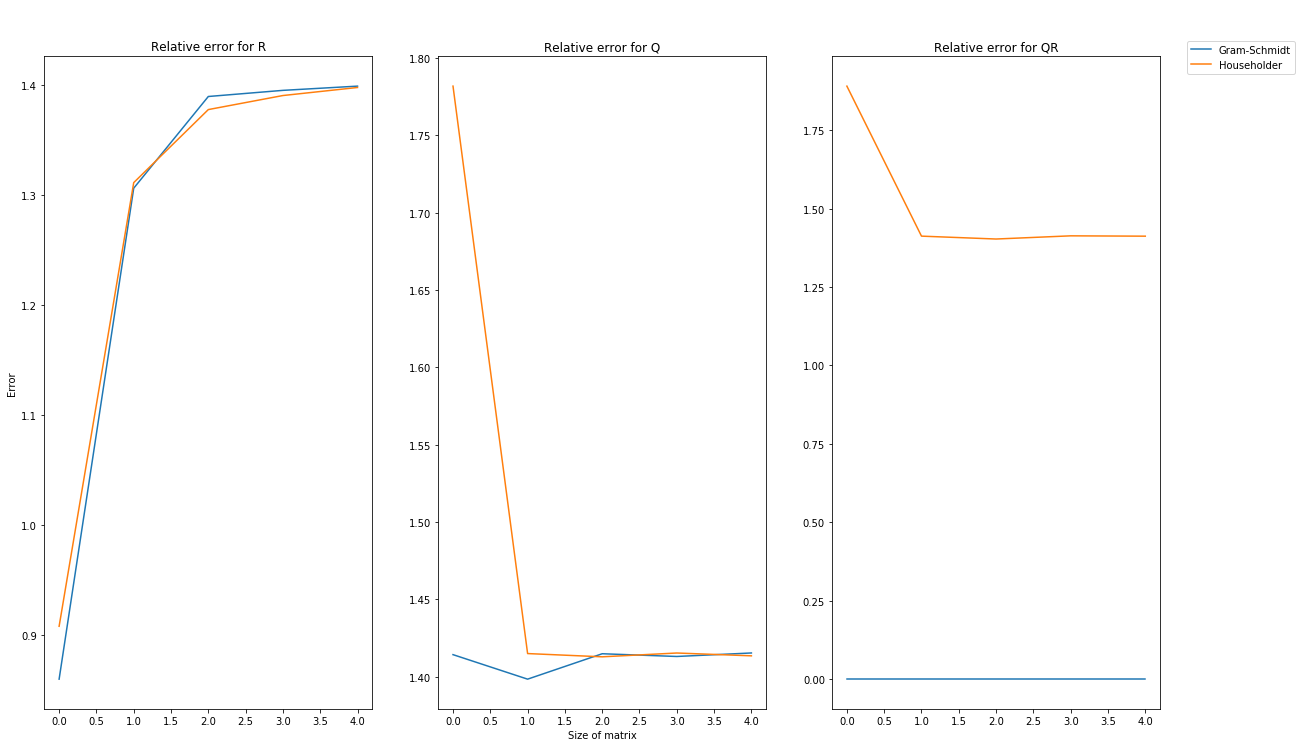

In [60]:
fig,axes = plt.subplots(1, 3,figsize = (20,12))

for i,method in zip([0,1],["Gram-Schmidt","Householder"]):
    for j,error in zip([0,1,2],['R','Q',"QR"]):
        axes[j].plot(relErr[i][j], label=method)
        axes[j].set_title(f"Relative error for {error}")
axes[1].set_xlabel("Size of matrix")
axes[0].set_ylabel("Error")
fig.legend(["Gram-Schmidt","Householder"],loc = (0.915,0.9))

## Problem 3 (Word2Vec as Matrix Factorization) 45 pts

In this assignment you are supposed to apply SVD to training your own [word embedding model](https://en.wikipedia.org/wiki/Word_embedding) which maps English words to vectors of real numbers.

Skip-Gram Negative Sampling (SGNS) word embedding model, commonly known as **word2vec** ([Mikolov et al., 2013](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)), is usually optimized by stochastic gradient descent. However, the optimization of SGNS objective can be viewed as implicit matrix factorization objective as was shown in ([Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf)).

###### 1. Notation
Assume we have a text corpus given as a sequence of words $\{w_1,w_2,\dots,w_n\}$ where $n$ may be larger than $10^{12}$ and $w_i \in \mathcal{V}$ belongs to a vocabulary of words $\mathcal{V}$. A word $c \in \mathcal{V}$ is called *a context* of word $w_i$ if they are found together in the text. More formally, given some measure $L$ of closeness between two words (typical choice is $L=2$), a word $c \in \mathcal{V}$ is called a context if $c \in \{w_{i-L}, \dots, w_{i-1}, w_{i+1}, \dots, w_{i+L} \}$ Let $\mathbf{w},\mathbf{c}\in\mathbb{R}^d$ be the *word embeddings* of word $w$ and context $c$, respectively. Assume they are specified by the mapping  $\Phi:\mathcal{V}\rightarrow\mathbb{R}^d$, so $\mathbf{w}=\Phi(w)$. The ultimate goal of SGNS word embedding model is to fit a good mapping $\Phi$.

Let $\mathcal{D}$ be a multiset of all word-contexts pairs observed in the corpus. In the SGNS model, the probability that word-context pair $(w,c)$ is observed in the corpus is modeled as the following distribution:

$$
P(\#(w,c)\neq 0|w,c) = \sigma(\mathbf{w}^\top \mathbf{c}) = \frac{1}{1 + \exp(-\mathbf{w}^\top \mathbf{c})},
$$

where $\#(w,c)$ is the number of times the pair $(w,c)$ appears in $\mathcal{D}$ and $\mathbf{w}^\top\mathbf{c}$ is the scalar product of vectors $\mathbf{w}$ and $\mathbf{c}$. Two important quantities which we will also use further are the number of times the word $w$ and the context $c$ appear in $\mathcal{D}$, which can be computed as

$$
\#(w) = \sum_{c\in\mathcal{V}} \#(w,c), \quad \#(c) = \sum_{w\in\mathcal{V}} \#(w,c).
$$


###### 2. Optimization objective

Vanilla word embedding models are trained by maximizing log-likelihood of observed word-context pairs, namely

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d}.
$$

Skip-Gram Negative Sampling approach modifies the objective by additionally minimizing the log-likelihood of random word-context pairs, so called *negative samples*. This idea incorporates some useful linguistic information that some number ($k$, usually $k=5$) of word-context pairs *are not* found together in the corpus which usually results in word embeddings of higher quality. The resulting optimization problem is

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) + k \cdot \mathbb{E}_{c'\sim P_\mathcal{D}} \log \sigma (-\mathbf{w}^\top\mathbf{c}) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d},
$$

where $P_\mathcal{D}(c)=\frac{\#(c)}{|\mathcal{D}|}$ is a probability distribution over word contexts from which negative samples are drawn.

[Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf) showed that this objective can be equivalently written as

$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} f(w,c) = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(\mathbf{w}^\top\mathbf{c}) + \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \log \sigma (-\mathbf{w}^\top\mathbf{c}) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d},
$$

A crucial observation is that this loss function depends only on the scalar product $\mathbf{w}^\top\mathbf{c}$ but not on embedding $\mathbf{w}$ and $\mathbf{c}$ separately.

###### 3. Matrix factorization problem statement

Let $|\mathcal{V}|=m$, $W \in \mathbb{R}^{m\times d}$ and $C \in \mathbb{R}^{m\times d}$ be matrices, where each row $\mathbf{w}\in\mathbb{R}^d$ of matrix $W$ is the word embedding of the corresponding word $w$ and each row $\mathbf{c}\in\mathbb{R}^d$ of matrix $C$ is the context embedding of the corresponding context $c$. SGNS embeds both words and their contexts into a low-dimensional space $\mathbb{R}^d$, resulting in the word and context matrices $W$ and $C$. The rows of matrix $W$ are typically used in NLP tasks (such as computing word similarities) while $C$ is ignored. It is nonetheless instructive to consider the product $W^\top C = M$. Viewed this way, SGNS can be described as factorizing an implicit matrix $M$ of dimensions $m \times m$ into two smaller matrices.

Which matrix is being factorized? A matrix entry $M_{wc}$ corresponds to the dot product $\mathbf{w}^\top\mathbf{c}$ . Thus, SGNS is factorizing a matrix in which each row corresponds to a word $w \in \mathcal{V}$ , each column corresponds to a context $c \in \mathcal{V}$, and each cell contains a quantity $f(w,c)$ reflecting the strength of association between that particular word-context pair. Such word-context association matrices are very common in the NLP and word-similarity literature. That said, the objective of SGNS does not explicitly state what this association metric is. What can we say about the association function $f(w,c)$? In other words, which matrix is SGNS factorizing? Below you will find the answers.

### Task 1 (theoretical) 5 pts

Solve SGNS optimization problem with respect to the $\mathbf{w}^\top\mathbf{c}$ and show that the matrix being factorized is

$$
M_{wc} = \mathbf{w}^\top\mathbf{c} = \log \left( \frac{\#(w,c) \cdot |\mathcal{D}|}{k\cdot\#(w)\cdot\#(c)} \right)
$$

**Hint:** Denote $x=\mathbf{w}^\top\mathbf{c}$, rewrite SGNG optimization problem in terms of $x$ and solve it.

**Note:** This matrix is called Shifted Pointwise Mutual Information (SPMI) matrix, as its elements can be written as

$$
\text{SPMI}(w,c) = M_{wc} = \mathbf{w}^\top\mathbf{c} = \text{PMI}(w,c) - \log k
$$

and $\text{PMI}(w,c) = \log \left( \frac{\#(w,c) \cdot |\mathcal{D}|}{\#(w)\cdot\#(c)} \right)$ is the well-known [pointwise mutual information](https://en.wikipedia.org/wiki/Pointwise_mutual_information) of $(w,c)$.

In [ ]:
# Your proof is here

Rewrite the optimization problem with new designations
$$
\mathcal{L} = \sum_{w \in \mathcal{V}} \sum_{c \in \mathcal{V}} \left( \#(w,c) \log \sigma(x) + 
\frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|} \log \sigma (-x) \right) \rightarrow \max_{\mathbf{w},\mathbf{c} \in \mathbb{R}^d},
$$

Taking into account the property of the sigmoid function
$$
    \sigma'(x) = \sigma(x)\big(1 - \sigma(x)\big) = \sigma(x) \sigma(-x) 
$$

We differentiate
\begin{align}
    \partial_x\mathcal{L} &= \#(w,c)\;\sigma(-x) - \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|}\sigma(x) = \\
    &= \#(w,c)\;\frac{1}{1 + \mathrm{e}^x} - \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|}\frac{\mathrm{e}^x}{1 + \mathrm{e}^x} = \;0\qquad |\cdot 1 + \mathrm{e}^x \neq 0
\end{align}

$$
    \#(w,c) - \frac{k\cdot\#(w)\cdot\#(c)}{|\mathcal{D}|}\mathrm{e}^x = \;0\\
$$

And obtain:
$$
    x = \log\left(\frac{\#(w,c)|\mathcal{D}|}{k\cdot\#(w)\cdot\#(c)}\right) = \text{PMI}(w,c) - \log k = \text{SPMI}(w,c)
$$

### Task 2 (practical) 40 pts

In [759]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

1. Download dataset [enwik8](http://mattmahoney.net/dc/enwik8.zip) of compressed Wikipedia articles and preprocess raw data with Perl script **main_.pl**. This script will clean all unnecessary symbols, make all words to lowercase, and produce only sentences with words.
```
!wget http://mattmahoney.net/dc/enwik8.zip -P data/
!unzip data/enwik8.zip
!perl main_.pl data/enwik8 > data/enwik8.txt
```

In [760]:
# Load enwik 8

import re
file = open("data/enwik8.txt", "r")
doclist = [line for line in file]
docstr = ''.join(doclist)
sentences = re.split(r'[.!?]', docstr)
sentences = [sentence.split() for sentence in sentences if len(sentence) > 1]

In [761]:
print (sentences[0])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution']


2. Construct the word vocabulary from the obtained sentences which enumerates words which occur more than $r=200$ times in the corpus.

In [762]:
from collections import Counter
from scipy.sparse import csr_matrix
import numpy as np

In [763]:
def create_vocabulary(sentences, r=200):
    # Your code is here
    wordset = [word for sentence in sentences for word in sentence]
    vocabulary = sorted([k for k,v in Counter(wordset).most_common() if v >= 200])
    vocabulary = {k:i for i,k in enumerate(vocabulary)}
    return vocabulary

In [764]:
vocab = create_vocabulary(sentences)

3. Scan the text corpus with sliding window of size $5$ and step $1$ (which corresponds to $L$=2) and construct co-occurrence word-context matrix $D$ with elements $D_{wc}=\#(w,c)$. Please, ignore words which occur less than $r=200$ times, but include them into the sliding window. Please, see the graphical illustration of the procedure described.  

<img src="./data/sliding_window.png" width=600>

In [765]:
def create_corpus_matrix(sentences, vocabulary):
    # Your code is here
    shape = (len(vocabulary),len(vocabulary))
    rows,cols,data = [],[],[]
    for sentence in sentences:
        padded = 2 * ['$'] + sentence
        for k,w in enumerate(padded):
            try:
                i = vocabulary[w]
            except KeyError:
                continue
            for c in padded[k-2:k]:
                try:
                    j = vocabulary[c]
                    if i == j:
                        continue
                    rows.append(i)
                    cols.append(j)
                    data.append(1)
                except KeyError:
                    continue
    sparsy = csr_matrix((data,(rows,cols)),shape=shape)
    corpus_matrix = sparsy.transpose() + sparsy
    return corpus_matrix

In [766]:
%time D = create_corpus_matrix(sentences, vocab)

Wall time: 20.8 s


4. To find good word embeddings, [Levy and Goldberg, 2015](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization.pdf) proposed to find rank-$d$ SVD of Shifted Positive Pointwise Mutual Information (SPPMI) matrix

$$
U \Sigma V^\top \approx \text{SPPMI},
$$

where $\text{SPPMI}(w, c) = \max\left(\text{SPMI}(w, c), 0 \right)$ and $\text{SPMI}(w, c)$ is the element of the matrix $\text{SPPMI}$ at position $(w, c)$.
Then use $W=U\sqrt{\Sigma}$ as word embedding matrix. Your task is to reproduce their results. Write function constructs $\text{SPPMI}$ matrix, computes its SVD and produces word-vectors matrix $W$. Pay attention that $\text{SPPMI}$ matrix is **sparse**!  

In [767]:
def compute_embeddings(D, k, d=200):
    # Your code is here
    SPMI = np.log(D / D.sum(0) / D.sum(1).reshape(-1,1) * D.sum() / k)
    #SPMI = np.log(D / np.outer(D.sum(1),D.sum(0)) * D.sum() / k)
    #the line above gives different results. In theory they should work 
    #in the same way, on practice - they don't
    SPPMI = csr_matrix(np.maximum(np.nan_to_num(SPMI),0))
    
    u,s,vh = svds(SPPMI,d,return_singular_vectors=True)
    embedding_matrix = u * np.sqrt(s)
    return embedding_matrix

In [768]:
k = 5 # negative sampling parameter
%time W = compute_embeddings(Dp, k)

C:\Users\onion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 11.7 s


5. Write class **WordVectors** using provided template.

In [769]:
class WordVectors:
    
    def __init__(self, vocabulary, embedding_matrix):
        self.vocab = vocabulary
        self.W = embedding_matrix
        self.inv_vocab = {v: k for k, v in self.vocab.items()}
        
    def word_vector(self, word):
        """ 
        Takes word and returns its word vector.
        """
        #Your code is here
        pos = self.vocab[word]
        word_vector = self.W[pos]
        return word_vector
    
    def nearest_words(self, word, top_n=10):
        """ 
        Takes word from the vocabulary and returns its top_n
        nearest neighbors in terms of cosine similarity.
        """
        #Your code is here
        w_v = self.word_vector(word).reshape(1,-1)
        similarity = cosine_similarity(W,w_v)
        pairs = [(x,"{:.3f}".format(y[0])) 
                 for x,y in zip(self.vocab.keys(),similarity)]
        neighbors = sorted(pairs, key=lambda x: 
                               x[1],reverse=True)[1:top_n+1]
        return neighbors

In [770]:
model = WordVectors(vocab, W)

In [771]:
%time model.nearest_words("anarchism")

Wall time: 44 ms


[('communism', '0.792'),
 ('anarcho', '0.787'),
 ('capitalism', '0.784'),
 ('socialism', '0.752'),
 ('liberalism', '0.727'),
 ('criticisms', '0.705'),
 ('capitalist', '0.662'),
 ('fascism', '0.565'),
 ('anarchist', '0.527'),
 ('marxist', '0.518')]

In [772]:
model.nearest_words("ussr")

[('ukraine', '0.671'),
 ('russia', '0.629'),
 ('poland', '0.550'),
 ('belarus', '0.538'),
 ('yugoslavia', '0.538'),
 ('romania', '0.517'),
 ('serbia', '0.507'),
 ('austria', '0.500'),
 ('hungary', '0.466'),
 ('bulgaria', '0.430')]

In [773]:
model.nearest_words("rap")

[('hop', '0.828'),
 ('hip', '0.817'),
 ('funk', '0.758'),
 ('rock', '0.737'),
 ('punk', '0.706'),
 ('music', '0.676'),
 ('pop', '0.666'),
 ('scene', '0.659'),
 ('band', '0.657'),
 ('jazz', '0.625')]

In [774]:
model.nearest_words("numerical")

[('computation', '0.547'),
 ('mathematical', '0.532'),
 ('calculations', '0.499'),
 ('polynomial', '0.485'),
 ('calculation', '0.473'),
 ('practical', '0.460'),
 ('statistical', '0.456'),
 ('symbolic', '0.455'),
 ('geometric', '0.441'),
 ('simplest', '0.438')]

In [775]:
model.nearest_words("linear")

[('differential', '0.759'),
 ('equations', '0.724'),
 ('equation', '0.682'),
 ('continuous', '0.674'),
 ('multiplication', '0.674'),
 ('integral', '0.672'),
 ('algebraic', '0.667'),
 ('vector', '0.654'),
 ('algebra', '0.630'),
 ('inverse', '0.622')]

In [776]:
model.nearest_words("algebra")

[('geometry', '0.795'),
 ('calculus', '0.730'),
 ('algebraic', '0.716'),
 ('differential', '0.687'),
 ('equations', '0.665'),
 ('equation', '0.648'),
 ('theorem', '0.647'),
 ('topology', '0.634'),
 ('linear', '0.630'),
 ('integral', '0.618')]

6. Calculate top 10 nearest neighbours with the corresponding cosine similarities for the words {numerical, linear, algebra} and insert them in the correspoding functions in ```pset2.py```.

# Problem 4 (eigenvalues)  45 pts

### 1. Theoretical tasks

* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

$$A = A^* \quad\Rightarrow\quad \lambda(A) \in \mathbb{R}$$ 

$\square\quad$ WLOG consider $x:\; \|x\| = 1$
$$
\lambda = \langle x,Ax \rangle = \langle Ax,x \rangle = \overline{\lambda}
\qquad\blacksquare$$

$$A^*A = AA^* \quad\&\&\quad \lambda(A) \in \mathbb{R}\quad\Rightarrow\quad A = A^*$$
$\square\quad$ Since A is normal, we can write is in the form:
$A = U\Lambda U^*$, where $U$ is unitary, $\Lambda$ is diagonal and contains eigenvalues of $A$.    
$$\Lambda = \Lambda^*,$$ because $\lambda(A) \in \mathbb{R}$.   
Therefore, $$A^* = U\Lambda^* U = U\Lambda U^* = A \quad\blacksquare$$

***

$$V \;\text{is unitary}\quad\Rightarrow\quad |\lambda(V)| = 1$$

$\square\quad$ Note, $V$ is normal and, hence, diagonalizable. Then

$$(U\Lambda U^*)^* = V^* = V^{-1} = (U\Lambda U^*)^{-1}$$  
$$U\Lambda^* U^* = U\Lambda^{-1} U^*$$ 
$$\Lambda^* \Lambda = I \quad\rightarrow\quad 
\overline{\lambda}\lambda = |\lambda|^2 = 1\quad\blacksquare$$  

$V$ is normal and $|\lambda(V)| = 1 \quad\Rightarrow\quad V$ is unitary

$\square\quad$ Since $V$ is normal  
$$V = U\Lambda U^*$$  
This $|\lambda(V)| = 1$ may be written as $\Lambda^* \Lambda = I$  
Thus,
$$VV^* = U\Lambda U^* U\Lambda^* U^* = 
U\Lambda\Lambda^* U^* = UU^* = 1\quad\blacksquare$$


* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block:

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

<font color='red'> I suppose, that here the determinant is already written and also it is probably suggested to consider on $J$ for large $n$ not at zero, since it is not perturbed herein </font>

Let's lay out the determinant of $J$ over its 1st column

$$
    \det J(\varepsilon) \;=\; (-1)^{n+1}\varepsilon\cdot
    \begin{vmatrix} 
     1 & & & & 0 \\ 
     \lambda & 1 & & \\ 
     & \ddots & \ddots & \\ 
     & & \lambda& 1 \\ 
     0& & & \lambda & 1 \\ 
    \end{vmatrix}_{\;n-1\times n-1}
    \!\!\!\!\!\!\!\!\! + \quad \lambda \cdot 
    \begin{vmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     0 & & & & \lambda  \\ 
    \end{vmatrix}_{\;n-1\times n-1}
$$

$$
    = \lambda^n -(-1)^n\varepsilon = 0
$$

Therefore, $\lambda = \sqrt[n]{\varepsilon}\cdot \underbrace{\sqrt[n]{-1}}_{n \text{ roots}}$, i.e. the eigenvalues of $J$ are distributed on a circle with radius $\sqrt[n]{\varepsilon}$ around the origin  
For large $n$, we have $\sqrt[n]\varepsilon \rightarrow 1$ - and eigenvalues are the unit circle with centre in the origin

### 2. PageRank


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(A)``` that takes an adjacency matrix $A$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $G$ (Google matrix).

* (3 pts) Find PageRank matrix $G$ that corresponds to the following graph: 
<img src="./data/graph.png" width=300>
What is its largest eigenvalue? What multiplicity does it have?

In [32]:
# implement the functions in the pset2.py file
from pset2 import pagerank_matrix, power_method, pagerank_matvec
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#4.2.2
row = [0,1,1,2,3,4]
col = [2,0,2,1,4,3]
data = [1,1,1,1,1,1]
A = csr_matrix((data,(row,col)),shape=(5,5))
G = pagerank_matrix(A)
G.toarray()

array([[0. , 0. , 0.5, 0. , 0. ],
       [1. , 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. , 0. ]])

***The characteristic equation of the matrix above:***

$$
    (\lambda + 1)(\lambda - 1)^2 
    (\lambda + \frac{1}{2} + \frac{i}{2})
    (\lambda + \frac{1}{2} - \frac{i}{2}) = 0
$$

***Our universe is designed so that you can't compare (order) complex numbers. The question "what is the largest eigenvalue?" is ill-posed. I can only compare real eigenvalues or compare all by their module (conversion to real and then comparison). I geuss, what was presumed is the largest real eigenvalue, which is $\lambda = 1$ of multiplicity 2***

* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method conveges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

In [3]:
#4.2.3
A = np.array([[2,-1],
              [-1,2]])
x0 = np.array([1,0])
x,s,res = power_method(A,x0,100)
print(s,"s converges to 3 is {}".format(np.allclose(3,s)),sep='\n')

3.0000000000000004
s converges to 3 is True


* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 

0.7856340621782084


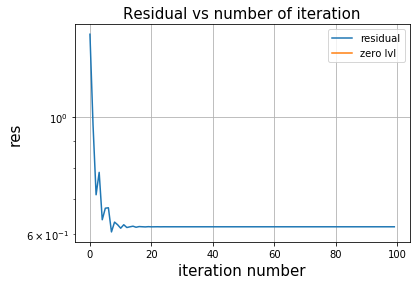

In [4]:
#4.2.4
# before executing this cell make sure that the last time 
# you exucuted 4.2.4 cell
x0 = np.random.rand(G.shape[0])
# x0 = np.array([1,0,0,0,0]) converges for the 
# deterministically selected start point
x,s,res = power_method(G,x0,100)

print(s)
plt.plot(res,label="residual")
plt.plot([0] * 100,label="zero lvl")
plt.title("Residual vs number of iteration",size=15)
plt.xlabel("iteration number",size=15)
plt.ylabel("res",size=15)
plt.yscale("log")
plt.grid()
plt.legend()

***The graph from the image has two nodes 3 and 4 which link to each other and nowhere else. If we start from one of these nodes we will go in a circle - moving from one vertex to another. So, our vector $x$ will flip from one direction to the opposite and back - and we will never converge. This problem is called "spider trap". And may be eliminated with introducing the damping factor***

* (2 pts) Consider the same graph, but with a directed edge that goes from the node 3 to the node 4 being removed. Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?

Google matrix
 [[0.  0.  0.5 0.  0. ]
 [1.  0.  0.5 0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0. ]]
lambda = 1.0000000000000004

Eigenvectors for different start points
[0.33333333 0.66666667 0.66666667 0.         0.        ]
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
[0.33333333 0.66666667 0.66666667 0.         0.        ]
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
[0.33333333 0.66666667 0.66666667 0.         0.        ]
[0.33333333 0.66666667 0.66666667 0.         0.        ]
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
[0.33333333 0.66666667 0.66666667 0.         0.        ]
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]
[-0.33333333 -0.66666667 -0.66666667  0.          0.        ]


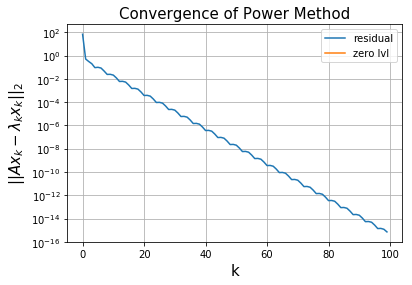

In [5]:
#4.2.5
row = [0,1,1,2,3]
col = [2,0,2,1,4]
data = [1,1,1,1,1]
A = csr_matrix((data,(row,col)),shape=(5,5))
G = pagerank_matrix(A)
print("Google matrix\n",G.toarray())

x0 = np.random.randint(1,3,G.shape[0])
x,s,res = power_method(G,x0,100)
print("lambda =",s)
plt.plot(res,label="residual")
plt.plot([0] * 100,label="zero lvl")
plt.title("Power Method Convergence",size=15)
plt.xlabel("k",size=15)
plt.ylabel(r"$\||A x_k - \lambda_k x_k\||_2$",size=15)
plt.yscale("log")
plt.grid()
plt.legend()

print("\nEigenvectors for different start points")
for _ in range(10):
    x0 = np.random.randn(G.shape[0])
    print(power_method(G,x0,100)[0])

***Here we have a dangling node: when we removed the edge from 3 to 4, we isolated vertex 3. There are no outgoing links. So, once we get there we are stuck and the ranking score is leaking (two last coordinates become 0), since it can't be transmited from there to anywhere. It converges but converges to a wrong result.  
Changing of sign occurs due to the fact that we compute just the absolute value of the eigenpair. Vector $x$ is set colinear to some certain direction, however it may point in the opposite directions***

In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

In [6]:
# The version accounting the presense of zero columns
def better_pagerank_matrix(A):
    # enter your code here
    if type(A) is not np.ndarray:
        positions = (A.sum(0) == 0).nonzero()[1]
        rows = np.repeat(range(A.shape[0]),len(positions))
        cols = np.tile(positions,A.shape[0])
        data = [1] * A.shape[0] * len(positions)
        B = csr_matrix((data,(rows,cols)),shape=A.shape)
        C = A + B
        return csr_matrix(C / C.sum(0))
    B = np.copy(A)
    positions = (A.sum(0) == 0).nonzero()[0]
    B[:,positions] = 1
    return csr_matrix(B / B.sum(0))

Google matrix
 [[0.006 0.006 0.491 0.2   0.006]
 [0.976 0.006 0.491 0.2   0.006]
 [0.006 0.976 0.006 0.2   0.006]
 [0.006 0.006 0.006 0.2   0.976]
 [0.006 0.006 0.006 0.2   0.006]]
lambda = 1.0
x = [-0.33834882 -0.66654718 -0.66323205 -0.03286212 -0.01668128]


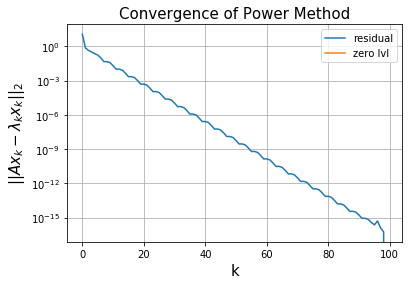

In [7]:
#4.2.6
row = [0,1,1,2,3]
col = [2,0,2,1,4]
data = [1,1,1,1,1]
A = np.zeros((5,5))

A = csr_matrix((data,(row,col)),shape=(5,5))
G = better_pagerank_matrix(A)


d = 0.97
N = G.shape[0]
G_d = (d * G).toarray() + (1-d) / N
print("Google matrix\n",G_d)

x0 = np.random.randn(N)
x,s,res = power_method(G_d,x0,100)
print("lambda =",s)
print("x =",x)
plt.plot(res,label="residual")
plt.plot([0] * 100,label="zero lvl")
plt.title("Power Method Convergence",size=15)
plt.xlabel("k",size=15)
plt.ylabel(r"$\||A x_k - \lambda_k x_k\||_2$",size=15)
plt.yscale("log")
plt.grid()
plt.legend()

* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

In [8]:
q = abs(np.polyfit(np.arange(100),np.log2(res),1))[0]
print("convergence rate is", q)
print("rough estimation of the second largest:",q * s)
print("the 2nd largest real eigenvalue in abs. value",
      np.sort(abs(np.linalg.eig(G_d)[0].real))[-2])

convergence rate is nan
rough estimation of the second largest: nan
the 2nd largest real eigenvalue in abs. value 0.541509842410716


C:\Users\onion\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [10]:
def sampling(low,high,num):
    '''
    Generates $num$ unique elements from the given range
    $[low,high)$
    
    Oсcupies less memory, but there is the restriction
    on its use: the greater the ratio $num / (high - low)$
    the less probability to generate a unique sample in a small
    number of repetitions
    '''
    if num / (high - low) > 0.1:
        raise Exception("Use more advanced method")
    sample = np.random.randint(low,high,num)
    i = 1
    while len(set(sample)) != num:
        i += 1
        sample = np.random.randint(low,high,num)
    print("sample has been constructed in {} repetition(s)".format(i))
    return sample

In [11]:
def advanced_sampling(n,r):
    '''
    Generates a matrix of size n-by-n filled with r ones
    The rest is zero.
    
    For a fixed input the runtime is relatively constant
    '''
    B = np.zeros(n * n)
    B[:r*r] = np.ones(r * r)
    np.random.shuffle(B)
    B = B.reshape(n,n)
    return csr_matrix(B)

In [42]:
N = 10000
r = 100
rows = sampling(0,N,r)
cols = sampling(0,N,r)
data = np.ones(r)
A = csr_matrix((data,(rows,cols)),shape=(N,N))
#A = advanced_sampling(N,r)
x = np.random.rand(N)

sample has been constructed in 1 repetition(s)
sample has been constructed in 1 repetition(s)


In [54]:
G = better_pagerank_matrix(A)
%timeit ((d * G).toarray() + (1 - d) / N) @ x
y1 = ((d * G).toarray() + (1 - d) / N) @ x

1.92 s ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
G = pagerank_matrix(A)
%timeit pagerank_matvec(G,d,x)
y2 = pagerank_matvec(G,d,x)

358 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
np.allclose(y1,y2)

True

```pagerank_matvec```***is more than 1000 times faster in comparison with the naive multiplication***

#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.

In [65]:
from scipy.sparse import load_npz
from scipy.sparse.linalg import LinearOperator
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def load_dblp(path_auth, path_graph):
    A = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return A, authors
A, authors = load_dblp('./data/dblp/dblp_authors.npz',
                       './data/dblp/dblp_graph.npz')

In [60]:
# Your code is here
A.size / A.shape[0] ** 2  # fraction of non-zero elements
hindex = np.array(A.sum(0)).reshape(-1)
top10 = np.argsort(hindex)[-10:]
print("top10:",*authors[top10],sep='\n')
A.data /= A.data
G = pagerank_matrix(A)

top10:
David G. Lowe
David E. Culler
Ion Stoica
Jitendra Malik
Cordelia Schmid
Anil K. Jain
Jiawei Han
Hari Balakrishnan
Andrew Zisserman
Scott Shenker


In [61]:
# check that the matrix is the left-stochastic
left_sums = np.array(G.sum(0),dtype=int).reshape(-1)
np.all(left_sums[left_sums > 0] == 1)

True

 * (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).

In [62]:
d = 0.85
LinOp = LinearOperator(G.shape, matvec=lambda x: pagerank_matvec(G,d,x))

* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.

In [64]:
x0 = np.ones(G.shape[0])
x,s,res = power_method(LinOp,x0,100)

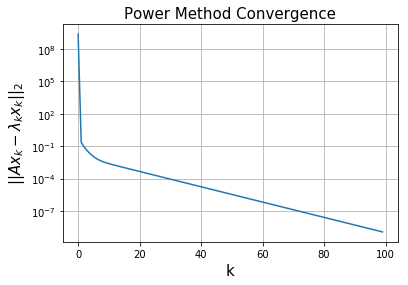

In [66]:
plt.plot(res)
plt.title("Power Method Convergence",size=15)
plt.xlabel("k",size=15)
plt.ylabel(r"$\||A x_k - \lambda_k x_k\||_2$",size=15)
plt.yscale("log")
plt.grid()

* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

In [82]:
top10 = np.argsort(x)[-10:]
print("top10:",*authors[top10][::-1],sep='\n')

top10:
Wei Wang
Yang Liu
Wei Zhang
Lei Wang
Wei Li
Athanasios V. Vasilakos
Lei Zhang
Jun Zhang
Jun Wang
Li Li
